# Project: Insurance Fraud Detection (DS)
---------------------------------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

*This dataset comes from the 2023 NESS Statathon (Theme 1). Here is a link to where the live competition is being hosted - feel free to join!*
* https://www.kaggle.com/competitions/2023-travelers-ness-statathon/overview

**Challenge:** You work for Travelers Insurance Company's fraud detection department as a modeler. Your colleagues, who are not familiar with statistics, would like you to create a predictive model based on historical claim data. Your team is concerned about the fraud detection accuracy as well as the key drivers that cause fraudulence.

For this case competition, your group is tasked with identifying first-party physical damage fraudulence and explaining the indicators of fraudulent claims.
  * Make sure you use the 'weighted' F1 score - you can just print this using the classification report (bottom right corner).
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

## 1.1 Dataset Description
All first-party physical damage claims will be filtered by claim handlers and some of them will be referred to the fraud detection team. Your data is a sample of these referred claims from 2015 to 2016.

As a simplification, you are just going to work with the train dataset (linked below). This is because it has the answers! All teams will use the same random_seed to split the data into train and test - Dave will do this part for you. You may not delete rows in the test partition, use `transform()` to update rows in test partition, you can do almost anything you want on the train partition. If there is data leakage, you automatically go into last place (more on that later.)

Your work is to build a model on the training data and apply your model to predict the fraud indicator for each claim in the test data.

**Variable Descriptions**
* claim_number - Claim ID **(cannot be used in model)**
* age_of_driver - Age of driver
* gender - Gender of driver
* marital_status - Marital status of driver
* safty_rating - Safety rating index of driver
* annual_income - Annual income of driver
* high_education_ind - Driver’s high education index
* address_change_ind - Whether or not the driver changed living address in past 1 year
* living_status - Driver’s living status, own or rent
* zip_code - Driver’s living address zipcode
* claim_date - Date of first notice of claim
* claim_day_of_week - Day of week of first notice of claim
* accident_site - Accident location, highway, parking lot or local
* past_num_of_claims - Number of claims the driver reported in past 5 years
* witness_present_ind - Witness indicator of the claim
* liab_prct - Liability percentage of the claim
* channel - The channel of purchasing policy
* policy_report_filed_ind - Policy report filed indicator
* claim_est_payout - Estimated claim payout
* age_of_vehicle - Age of first party vehicle
* vehicle_category - Category of first party vehicle
* vehicle_price - Price of first party vehicle
* vehicle_color - Color of first party vehicle
* vehicle_weight - Weight of first party vehicle
* fraud - Fraud indicator (0=no, 1=yes). **This is the response variable.**

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 150MB/s]


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

df = pd.read_csv('train_2023.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


In [ ]:
# hint: do you have imbalanced data?
df['fraud'].value_counts() # yes you do!

0    16062
1     2938
Name: fraud, dtype: int64

In [ ]:
#Dropping zip_code Column as it did not make any sense with the zip coe in predicting the target variable Fraud
df= df.drop('zip_code', axis=1)
df= df.drop('claim_date', axis=1)

In [ ]:
#fraud
df['fraud'] = df['fraud'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             19000 non-null  int64  
 1   age_of_driver            19000 non-null  int64  
 2   gender                   19000 non-null  object 
 3   marital_status           18996 non-null  float64
 4   safty_rating             19000 non-null  int64  
 5   annual_income            19000 non-null  int64  
 6   high_education_ind       19000 non-null  int64  
 7   address_change_ind       19000 non-null  int64  
 8   living_status            19000 non-null  object 
 9   claim_day_of_week        19000 non-null  object 
 10  accident_site            19000 non-null  object 
 11  past_num_of_claims       19000 non-null  int64  
 12  witness_present_ind      18857 non-null  float64
 13  liab_prct                19000 non-null  int64  
 14  channel               

In [ ]:
# split the data (don't change this!)

X = df.drop(['claim_number', 'fraud'],axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 23)
(15200, 21) (15200,)
(3800, 21) (3800,)


In [ ]:
#Checking the missing values per column in the data set
df.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               4
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        143
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            23
age_of_vehicle               7
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

# 1.2 Cleaning Data

In [ ]:
#Checking the missing values in the marital_status and imputing those values
print(X_train['marital_status'].isnull().sum())
print(X_test['marital_status'].isnull().sum())

4
0


In [ ]:
#By using SimpleImputer from sklearn imputed the marital_status column using most_frequent as the stratergy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train[['marital_status']])
X_train['marital_status'] = imputer.transform(X_train[['marital_status']])
X_test['marital_status'] = imputer.transform(X_test[['marital_status']])




# We can also use pandas to run a similar code like above, here we will use mode to filter outer the most frequent repeating pattern
most_frequent_value = X_train['marital_status'].mode()[0]
X_train['marital_status'].fillna(most_frequent_value, inplace=True)
X_test['marital_status'].fillna(most_frequent_value, inplace=True)


print(X_train['marital_status'].isnull().sum())
print(X_test['marital_status'].isnull().sum())

0
0


In [ ]:
#Checking the missing values in the witness_present_ind and imputing those values
print(X_train['witness_present_ind'].isnull().sum())
print(X_test['witness_present_ind'].isnull().sum())

113
30


In [ ]:
#By using SimpleImputer from sklearn imputed the missing columns of witness_present_ind  using most_frequent as the stratergy
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train[['witness_present_ind']])
X_train['witness_present_ind'] = imputer.transform(X_train[['witness_present_ind']])
X_test['witness_present_ind'] = imputer.transform(X_test[['witness_present_ind']])




# We can also use pandas to run a similar code like above, here we will use mode to filter outer the most frequent repeating pattern
most_frequent_value = X_train['witness_present_ind'].mode()[0]
X_train['witness_present_ind'].fillna(most_frequent_value, inplace=True)
X_test['witness_present_ind'].fillna(most_frequent_value, inplace=True)


print(X_train['witness_present_ind'].isnull().sum())
print(X_test['witness_present_ind'].isnull().sum())

0
0


In [ ]:
#Checking the missing values in the claim_est_payout and imputing those values
print(X_train['claim_est_payout'].isnull().sum())
print(X_test['claim_est_payout'].isnull().sum())

18
5


In [ ]:
#By using SimpleImputer from sklearn imputed the missing columns of claim_est_payout  using most_frequent as the stratergy
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train[['claim_est_payout']])
X_train['claim_est_payout'] = imputer.transform(X_train[['claim_est_payout']])
X_test['claim_est_payout'] = imputer.transform(X_test[['claim_est_payout']])



# We can also use pandas to run a similar code like above, here we will use mode to filter outer the most frequent repeating pattern
most_frequent_value = X_train['claim_est_payout'].mode()[0]
X_train['claim_est_payout'].fillna(most_frequent_value, inplace=True)
X_test['claim_est_payout'].fillna(most_frequent_value, inplace=True)



print(X_train['claim_est_payout'].isnull().sum())
print(X_test['claim_est_payout'].isnull().sum())

0
0


In [ ]:
#Checking the missing values in the  column age_of_vehicle and imputing those values
print(X_train['age_of_vehicle'].isnull().sum())
print(X_test['age_of_vehicle'].isnull().sum())

6
1


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15200 non-null  int64  
 1   gender                   15200 non-null  object 
 2   marital_status           15200 non-null  float64
 3   safty_rating             15200 non-null  int64  
 4   annual_income            15200 non-null  int64  
 5   high_education_ind       15200 non-null  int64  
 6   address_change_ind       15200 non-null  int64  
 7   living_status            15200 non-null  object 
 8   claim_day_of_week        15200 non-null  object 
 9   accident_site            15200 non-null  object 
 10  past_num_of_claims       15200 non-null  int64  
 11  witness_present_ind      15200 non-null  float64
 12  liab_prct                15200 non-null  int64  
 13  channel                  15200 non-null  object 
 14  policy_report_filed

In [ ]:
#By using SimpleImputer from sklearn imputed the missing column of age_of_vehicle  using mean as the stratergy
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train[['age_of_vehicle']])
X_train['age_of_vehicle'] = imputer.transform(X_train[['age_of_vehicle']])
X_test['age_of_vehicle'] = imputer.transform(X_test[['age_of_vehicle']])



# We can also use pandas to run a similar code like above, here we will use just mean to replace those missing values
X_train['age_of_vehicle'].fillna(X_train['age_of_vehicle'].mean(), inplace=True)
X_test['age_of_vehicle'].fillna(X_train['age_of_vehicle'].mean(), inplace=True)



print(X_train['age_of_vehicle'].isnull().sum())
print(X_test['age_of_vehicle'].isnull().sum())

0
0


In [ ]:
print(X_test.isnull().sum().sum())
print(X_train.isnull().sum().sum())


0
0


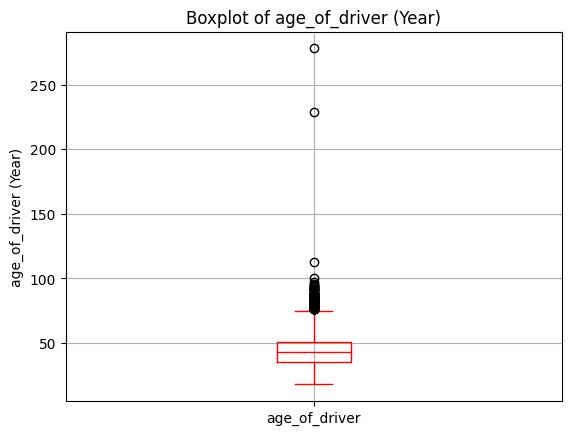

In [ ]:
# Boxplot to check the outliers present in the age_of_driver column

import matplotlib.pyplot as plt
X_train.boxplot('age_of_driver', color='red') # grab the dataframe then select the 'medv' column
plt.ylabel('age_of_driver (Year)')
plt.title("Boxplot of age_of_driver (Year)")
plt.show()

In [ ]:
#Finding those outliers and imputing those with the mean value

# Calculate the first quartile (Q1) and third quartile (Q3) of the "age_of_driver" column in X_train
Q1 = X_train['age_of_driver'].quantile(0.25)
Q3 = X_train['age_of_driver'].quantile(0.75)

# Calculating the IQR (interquartile range) based on X_train
IQR = Q3 - Q1

# Finding the lower and upper bounds to identify outliers based on X_train
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Imputing outliers in X_train
X_train['age_of_driver'] = np.where((X_train['age_of_driver'] < lower_bound)
| (X_train['age_of_driver'] > upper_bound), X_train['age_of_driver'].mean(), X_train['age_of_driver'])

# Imputing outliers in X_test
X_test['age_of_driver'] = np.where((X_test['age_of_driver'] < lower_bound)
| (X_test['age_of_driver'] > upper_bound), X_train['age_of_driver'].mean(), X_test['age_of_driver'])

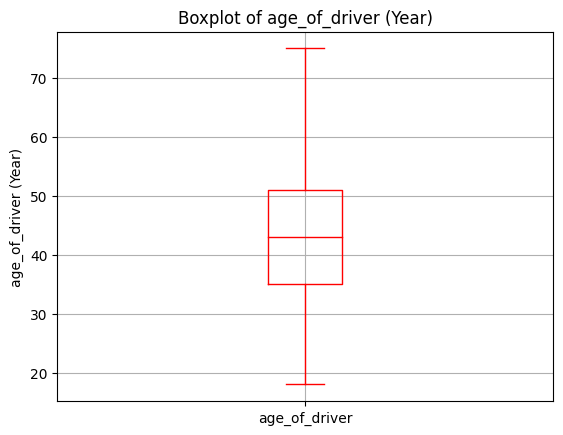

In [ ]:
#Verifying the outliers

X_train.boxplot('age_of_driver', color='red') # grab the dataframe then select the 'medv' column
plt.ylabel('age_of_driver (Year)')
plt.title("Boxplot of age_of_driver (Year)")
plt.show()

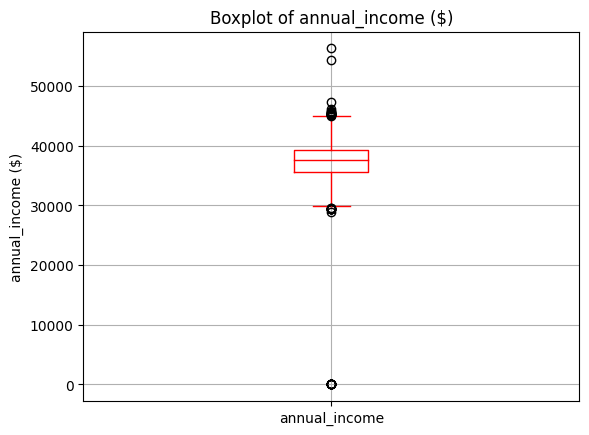

In [ ]:
# Boxplot to check the outliers present in the annual_income column
X_train.boxplot('annual_income', color='red')
plt.ylabel('annual_income ($)')
plt.title("Boxplot of annual_income ($)")
plt.show()

In [ ]:
#Finding the outliers and imputing those with the mean value

# Calculating the first quartile (Q1) and third quartile (Q3) of the "age_of_driver" column in X_train
Q1 = X_train['annual_income'].quantile(0.25)
Q3 = X_train['annual_income'].quantile(0.75)

# Calculating the IQR (interquartile range) based on X_train
IQR = Q3 - Q1

# Finding the lower and upper bounds to identify outliers based on X_train
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Imputing outliers in X_train
X_train['annual_income'] = np.where((X_train['annual_income'] < lower_bound)
| (X_train['annual_income'] > upper_bound), X_train['annual_income'].mean(), X_train['annual_income'])

# Imputing outliers in X_test
X_test['annual_income'] = np.where((X_test['annual_income'] < lower_bound)
| (X_test['annual_income'] > upper_bound), X_train['annual_income'].mean(), X_test['annual_income'])

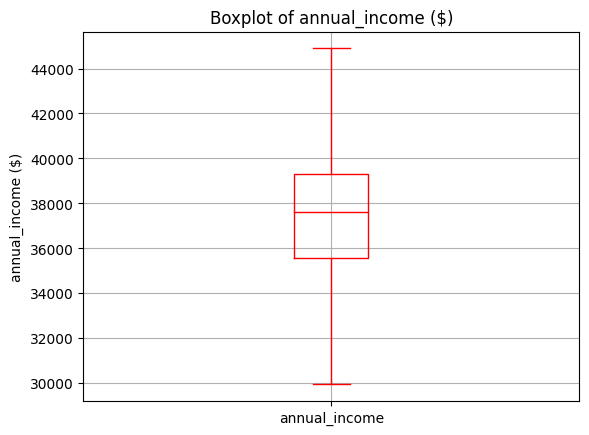

In [ ]:
#Verifying the outliers

import matplotlib.pyplot as plt
X_train.boxplot('annual_income', color='red') # grab the dataframe then select the 'medv' column
plt.ylabel('annual_income ($)')
plt.title("Boxplot of annual_income ($)")
plt.show()

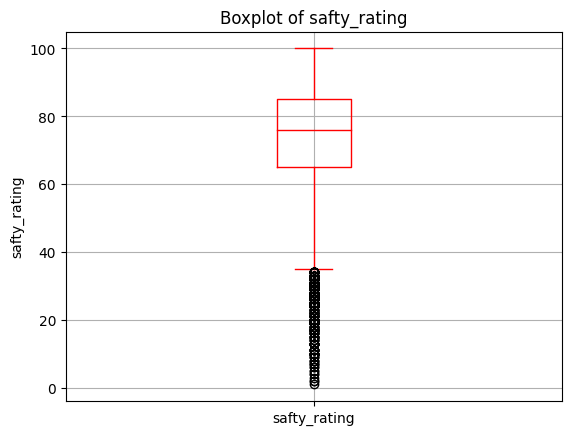

In [ ]:
# Boxplot to check the outliers present in the safty_rating

import matplotlib.pyplot as plt
X_train.boxplot('safty_rating', color='red') # grab the dataframe then select the 'medv' column
plt.ylabel('safty_rating')
plt.title("Boxplot of safty_rating")
plt.show()

In [ ]:
#Finding the outliers and imputing those with the median value

# Calculating the first quartile (Q1) and third quartile (Q3) of the "age_of_driver" column in X_train
Q1 = X_train['safty_rating'].quantile(0.25)
Q3 = X_train['safty_rating'].quantile(0.75)

# Calculating the IQR (interquartile range) based on X_train
IQR = Q3 - Q1

# Finding the lower and upper bounds to identify outliers based on X_train
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Imputing outliers in X_train
X_train['safty_rating'] = np.where((X_train['safty_rating'] < lower_bound)
| (X_train['safty_rating'] > upper_bound), X_train['safty_rating'].mean(), X_train['safty_rating'])

# Imputing outliers in X_test
X_test['safty_rating'] = np.where((X_test['safty_rating'] < lower_bound)
| (X_test['safty_rating'] > upper_bound), X_train['safty_rating'].mean(), X_test['safty_rating'])

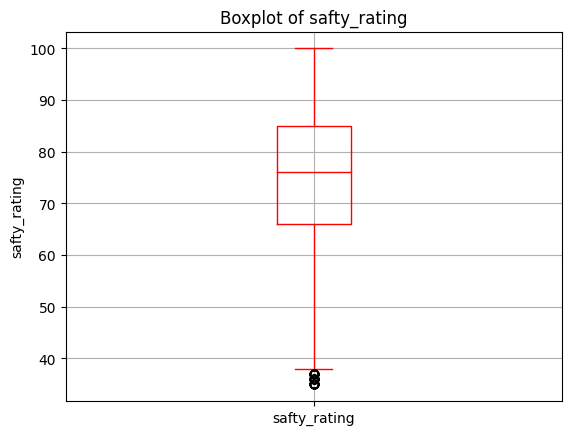

In [ ]:
#Verifying the outliers of safty_rating

import matplotlib.pyplot as plt
X_train.boxplot('safty_rating', color='red') # grab the dataframe then select the 'medv' column
plt.ylabel('safty_rating')
plt.title("Boxplot of safty_rating")
plt.show()

## 1.2.1 Conversion of Data Types

In [ ]:
# Checking the data types of each column

print(X_train.info())
print(X_train.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15200 non-null  float64
 1   gender                   15200 non-null  object 
 2   marital_status           15200 non-null  float64
 3   safty_rating             15200 non-null  float64
 4   annual_income            15200 non-null  float64
 5   high_education_ind       15200 non-null  int64  
 6   address_change_ind       15200 non-null  int64  
 7   living_status            15200 non-null  object 
 8   claim_day_of_week        15200 non-null  object 
 9   accident_site            15200 non-null  object 
 10  past_num_of_claims       15200 non-null  int64  
 11  witness_present_ind      15200 non-null  float64
 12  liab_prct                15200 non-null  int64  
 13  channel                  15200 non-null  object 
 14  policy_report_filed

In [ ]:
# Converting the Categorical Variable F&M in the gender column using numpanda , Used np.where rather than get.dummies as we had just 2 categories in the gender category
X_train['gender'] = np.where(X_train['gender'] == 'M', 1, 0)
X_test['gender'] = np.where(X_test['gender'] == 'M', 1, 0)

In [ ]:
#Converting the Categorical Variable Own&Rent in the living_status column using numpanda , Used np.where rather than get.dummies as we had just 2 categories in the living_status category

X_train['living_status'] = np.where(X_train['living_status'] == 'Own', 1, 0)
X_test['living_status'] = np.where(X_test['living_status'] == 'Own', 1, 0)

In [ ]:
#Converting all the columns which has categories from 3 to 6 and made sense converting it into numerical values.
#'vehicle_color','claim_day_of_week','accident_site','channel','vehicle_category' all these columns are converted into dummy variables by using pd.get_dummies

X_train = pd.get_dummies(X_train,columns=['vehicle_color','claim_day_of_week','accident_site','channel','vehicle_category'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['vehicle_color','claim_day_of_week','accident_site','channel','vehicle_category'], drop_first=True)

In [ ]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_of_driver                15200 non-null  float64
 1   gender                       15200 non-null  int64  
 2   marital_status               15200 non-null  float64
 3   safty_rating                 15200 non-null  float64
 4   annual_income                15200 non-null  float64
 5   high_education_ind           15200 non-null  int64  
 6   address_change_ind           15200 non-null  int64  
 7   living_status                15200 non-null  int64  
 8   past_num_of_claims           15200 non-null  int64  
 9   witness_present_ind          15200 non-null  float64
 10  liab_prct                    15200 non-null  int64  
 11  policy_report_filed_ind      15200 non-null  int64  
 12  claim_est_payout             15200 non-null  float64
 13  age_of_vehicl

## 1.2.2 Dropping Column

In [ ]:
# #Dropping Claim Date Column as itshowed weak relationship and did not make any sense with the claim date in predicting the target variable Fraud
# X_train = X_train.drop('claim_date', axis=1)
# X_test = X_test.drop('claim_date', axis=1)


In [ ]:
# #Dropping zip_code Column as it did not make any sense with the zip coe in predicting the target variable Fraud
# X_train = X_train.drop('zip_code', axis=1)
# X_test = X_test.drop('zip_code', axis=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15200, 34) (15200,)
(3800, 34) (3800,)


# 1.3 Plots

In [ ]:

#To check the correlation of Training set first creating a data frame Y
import pandas as pd

# Assuming X_train and y_train are data frames

# Create a new DataFrame Y by concatenating X_train and y_train
Y = pd.DataFrame(data=pd.concat([X_train, y_train], axis=1))

# Print the resulting DataFrame
Y.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_of_driver                15200 non-null  float64
 1   gender                       15200 non-null  int64  
 2   marital_status               15200 non-null  float64
 3   safty_rating                 15200 non-null  float64
 4   annual_income                15200 non-null  float64
 5   high_education_ind           15200 non-null  int64  
 6   address_change_ind           15200 non-null  int64  
 7   living_status                15200 non-null  int64  
 8   past_num_of_claims           15200 non-null  int64  
 9   witness_present_ind          15200 non-null  float64
 10  liab_prct                    15200 non-null  int64  
 11  policy_report_filed_ind      15200 non-null  int64  
 12  claim_est_payout             15200 non-null  float64
 13  age_of_vehicl

In [ ]:
Y['fraud'] = Y['fraud'].astype(int)

Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_of_driver                15200 non-null  float64
 1   gender                       15200 non-null  int64  
 2   marital_status               15200 non-null  float64
 3   safty_rating                 15200 non-null  float64
 4   annual_income                15200 non-null  float64
 5   high_education_ind           15200 non-null  int64  
 6   address_change_ind           15200 non-null  int64  
 7   living_status                15200 non-null  int64  
 8   past_num_of_claims           15200 non-null  int64  
 9   witness_present_ind          15200 non-null  float64
 10  liab_prct                    15200 non-null  int64  
 11  policy_report_filed_ind      15200 non-null  int64  
 12  claim_est_payout             15200 non-null  float64
 13  age_of_vehicl

In [ ]:
#1
import seaborn as sns


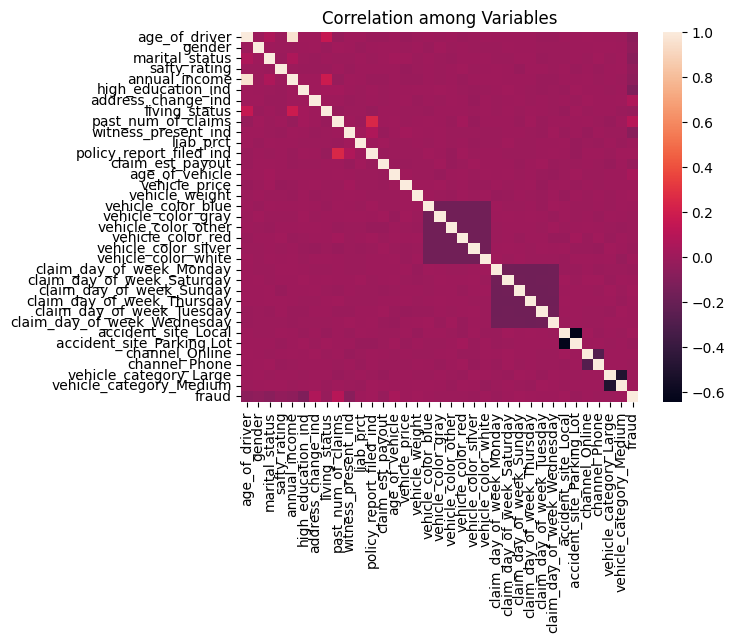

In [ ]:
#Plot 1 - Correlation among Variables : Gives a idea about the importance of Predictive Variables

corr = Y.corr()
#corr

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title ("Correlation among Variables")
plt.show()

# The below plot gives the correlation of the predictor variables to the target variable.
#The below plot will help us to understand which variable will impact the target variable most and which will have a lower impact
#This is one plot which i like to go through in the beginning of dataset.


In [ ]:
#This Table tells us the values of Correlation of the Predictor Variables to the Target Variable
corr = Y.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,claim_day_of_week_Monday,claim_day_of_week_Saturday,claim_day_of_week_Sunday,claim_day_of_week_Thursday,claim_day_of_week_Tuesday,claim_day_of_week_Wednesday,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_category_Large,vehicle_category_Medium,fraud
age_of_driver,1.000000,-0.000532,0.055619,-0.001557,0.985845,0.005496,0.007054,0.154046,-0.040772,0.010233,0.010277,-0.011044,-0.009643,0.004447,-0.010106,-0.003703,0.003684,-0.006596,0.003758,-0.010697,-0.000671,0.009909,0.005303,0.005338,-0.000058,0.000971,-0.013036,-0.011354,0.001757,-0.000943,0.004487,0.000854,-0.002502,-0.004472,-0.059543
gender,-0.000532,1.000000,0.003862,-0.005575,0.000184,0.000913,0.010975,-0.011892,0.008215,0.007191,-0.009908,0.003611,0.009608,0.005072,-0.001826,0.007910,-0.008793,0.013383,-0.002751,0.001196,-0.001576,-0.004730,-0.003942,0.008246,0.000252,0.004804,-0.006429,-0.002916,-0.005234,0.001493,0.005287,0.008007,0.010220,0.000446,-0.047392
marital_status,0.055619,0.003862,1.000000,-0.007904,0.055887,-0.001685,-0.008036,0.005032,-0.004788,-0.007336,0.006136,-0.002691,0.002755,0.019535,0.006708,-0.001380,0.007432,-0.005242,-0.011650,0.000851,0.000231,0.009652,-0.006438,-0.003070,0.009610,0.007096,-0.013585,-0.002349,-0.001645,0.002798,-0.004783,0.016144,-0.001884,0.008287,-0.076894
safty_rating,-0.001557,-0.005575,-0.007904,1.000000,-0.002261,-0.013718,-0.009403,-0.011314,0.000737,-0.007359,0.001067,0.004769,-0.000561,0.001017,-0.016346,-0.000353,0.003071,0.001151,-0.000122,0.011368,-0.009241,-0.001802,0.011245,0.002928,-0.015179,0.007658,0.008001,-0.005361,0.005013,-0.006632,-0.000005,-0.007757,0.004068,0.003768,-0.039035
annual_income,0.985845,0.000184,0.055887,-0.002261,1.000000,0.005793,0.004925,0.154262,-0.041416,0.008017,0.008453,-0.011260,-0.007976,0.004089,-0.008790,-0.004923,0.001572,-0.005817,0.004946,-0.013033,0.001413,0.009470,0.005619,0.005276,-0.000334,0.001875,-0.012446,-0.011102,0.001853,-0.000058,0.005373,-0.000913,-0.003346,-0.005191,-0.061507
high_education_ind,0.005496,0.000913,-0.001685,-0.013718,0.005793,1.000000,0.006163,0.021510,0.018094,-0.000265,-0.007643,0.008253,-0.002963,-0.005152,0.002660,0.006495,0.008656,0.015706,0.006427,-0.004181,-0.009971,-0.004864,0.003196,0.013605,0.003966,-0.003896,-0.008425,-0.006315,-0.013661,0.014215,0.000832,0.003116,-0.005746,0.001295,-0.110389
address_change_ind,0.007054,0.010975,-0.008036,-0.009403,0.004925,0.006163,1.000000,0.001419,0.002346,-0.011730,-0.004530,0.002690,-0.004622,0.000304,0.005753,-0.010298,0.002006,-0.002078,0.007299,0.002809,-0.019241,0.011042,-0.003690,0.003535,0.005963,-0.004679,0.003995,-0.005802,0.003501,-0.001194,0.015174,0.003341,0.000026,0.006865,0.068253
living_status,0.154046,-0.011892,0.005032,-0.011314,0.154262,0.021510,0.001419,1.000000,-0.027364,-0.002136,-0.005423,-0.023027,0.002930,-0.004850,-0.009140,-0.005136,-0.011799,0.004472,-0.000807,0.003253,-0.004627,0.008123,-0.004520,0.011787,-0.006084,0.011600,-0.000396,-0.005883,-0.014501,0.018000,-0.004789,0.002588,-0.000015,-0.012527,-0.025649
past_num_of_claims,-0.040772,0.008215,-0.004788,0.000737,-0.041416,0.018094,0.002346,-0.027364,1.000000,0.008028,-0.008494,0.247638,0.007061,0.011206,-0.000103,0.009531,0.009993,-0.001444,-0.008462,0.020397,-0.021663,0.005363,-0.003039,0.010288,-0.011248,0.008631,-0.007755,0.001722,-0.000742,0.002640,0.016349,0.001151,-0.013856,0.003908,0.087515
witness_present_ind,0.010233,0.007191,-0.007336,-0.007359,0.008017,-0.000265,-0.011730,-0.002136,0.008028,1.000000,0.012408,0.063526,-0.018316,0.001817,0.021130,0.007526,-0.000255,0.005390,-0.003141,-0.001187,-0.001518,-0.003658,-0.

In [ ]:
# #Dropping these Columns bases on the Correlation Table and plot as they had a weak relationship with the target variable
# cols_to_drop = ['vehicle_category_Medium','vehicle_category_Large','safty_rating','accident_site_Local','accident_site_Parking Lot','channel_Online','channel_Phone','claim_day_of_week_Tuesday','claim_day_of_week_Monday','claim_day_of_week_Wednesday','claim_day_of_week_Saturday','claim_day_of_week_Sunday','claim_day_of_week_Thursday','liab_prct','vehicle_price','vehicle_color_blue','vehicle_color_other','vehicle_color_gray','vehicle_color_red','vehicle_color_white','vehicle_color_silver','living_status','policy_report_filed_ind','vehicle_weight']
# # Assuming cols_to_drop is a list of column names to be dropped

# # Drop columns from X_train
# X_train = X_train.drop(cols_to_drop, axis=1)

# # Drop columns from X_test
# X_test = X_test.drop(cols_to_drop, axis=1)


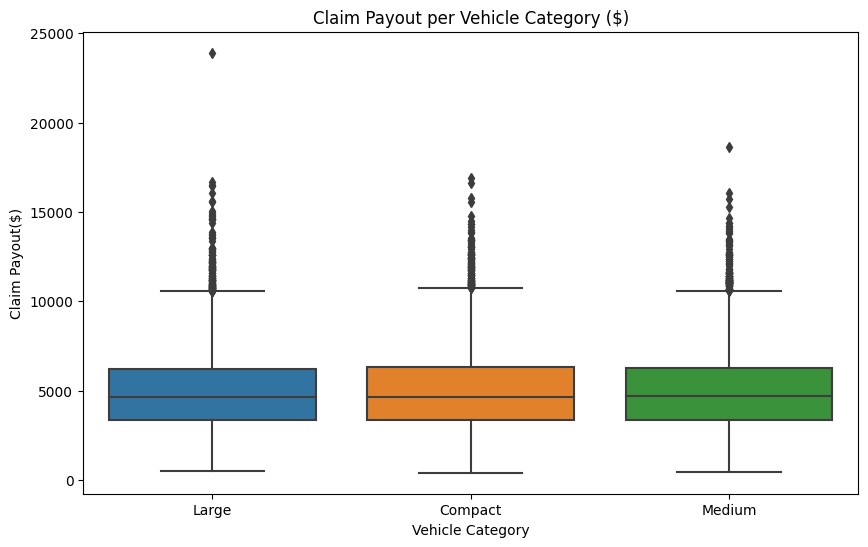

In [ ]:
# Boxplot showing the Claim_est_payout with respect to vehicle_category

plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle_category', y='claim_est_payout', data=df)
plt.xlabel('Vehicle Category')
plt.ylabel('Claim Payout($)')
plt.title('Claim Payout per Vehicle Category ($)')
plt.show()

# The below boxplot gives each vehicle_categories , claim_est_payout in a clear way


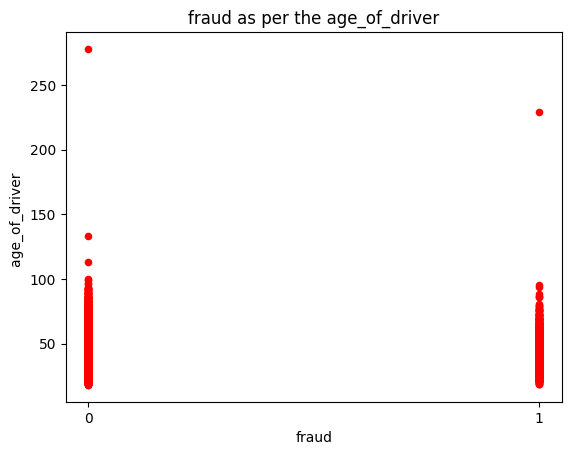

In [ ]:
#2 fraud Distribution as per the age_of_driver
df.plot.scatter(x='fraud', y='age_of_driver', color='red')
plt.xlabel("fraud")
plt.ylabel("age_of_driver ")
plt.title("fraud as per the age_of_driver")
plt.show()

# This scatter plot will help us to look at for which age groups the most fraud takes place.
#It provides us pattern to look for which group has the most such activities
#In the below graph we can see almost a similar pattern for the age groups

In [ ]:
# # This Plot tells us the total number of claims per month that can be categoried as fraudlent or not Fraudlent
# df['claim_date'] = pd.to_datetime(df['claim_date'])
# fraud_by_month = df['claim_date'].dt.month.value_counts().sort_index()
# fraud_by_month.plot(kind='line', marker='o')
# plt.xlabel('Month in Number')
# plt.ylabel('Number of Claims')
# plt.title('Monthly Number of claims that can be categoried as fraudlent or Non-Fraudlent')
# plt.show()


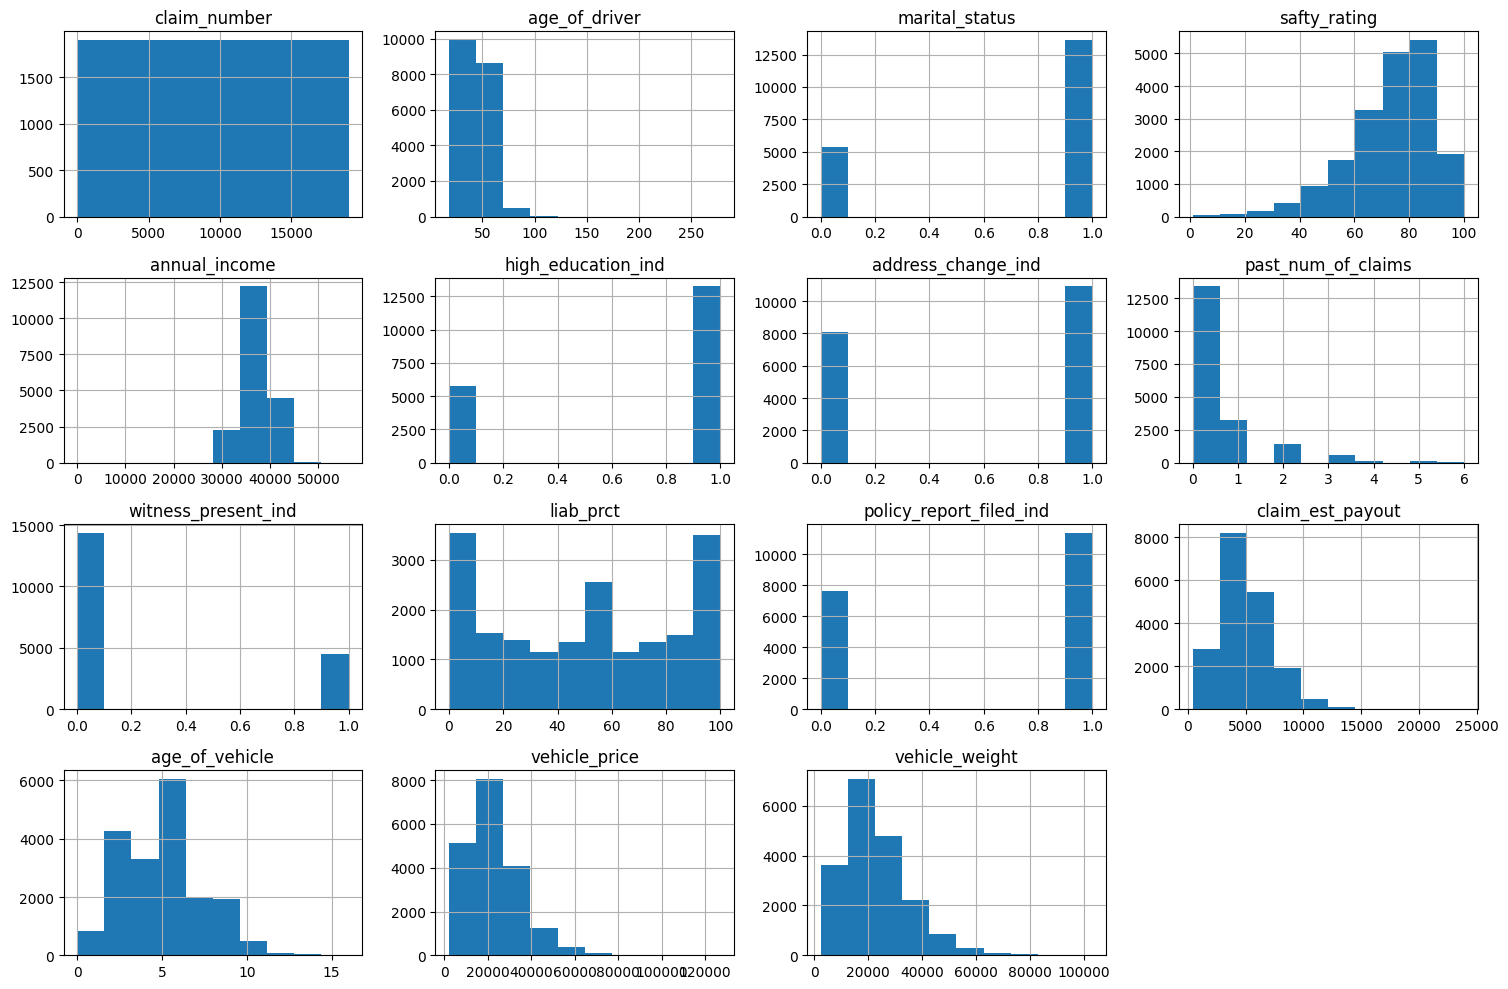

In [ ]:
#Histograms of ALL variables
#Histograms tells us  the shape of the distribution
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

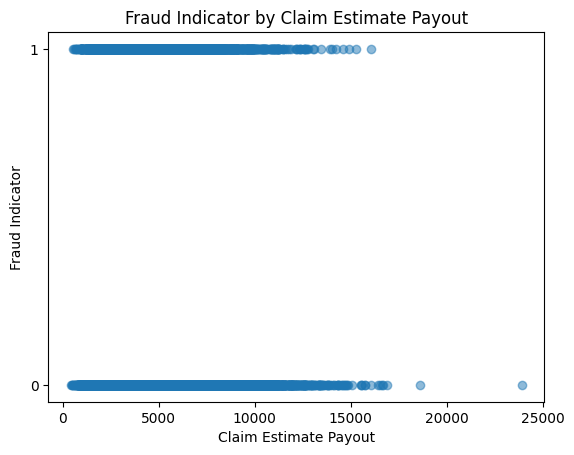

In [ ]:
#Plot showing Fraud by Claim Estimate Payout
import matplotlib.pyplot as plt

plt.scatter(df['claim_est_payout'], df['fraud'], alpha=0.5)
plt.xlabel('Claim Estimate Payout')
plt.ylabel('Fraud Indicator')
plt.title('Fraud Indicator by Claim Estimate Payout')
plt.show()


# 1.4 Tables

In [ ]:
#1 The below table gives the Average age of driver on the basis of categories of Fraud

age_fraud_df = df.groupby('fraud')['age_of_driver'].mean().reset_index()
age_fraud_df.columns = ['Fraud', 'Average Age'] #As we need it only on age_of_driver and the fraud
age_fraud_df = pd.DataFrame(age_fraud_df) #creating the table
age_fraud_df.head()  #printing the output


#This tables gives the average age of driver on each category of the Fraud column







,Fraud,Average Age
0,0,43.937305
1,1,41.790674


In [ ]:
#2 The below tabls gives us the average annual_income per category of teh Fraud Column

income_fraud_df = df.groupby('fraud')['annual_income'].mean().reset_index()
income_fraud_df.columns = ['Fraud', 'Average Annual Income']   # Seperating the columns Fraud & Average_Annual_income to make the table neat
income_fraud_df = pd.DataFrame(income_fraud_df)   # Creating the data frame

income_fraud_df.head()   # Printing the output

#This table neatly tells us the average annual income per category of Fraud



,Fraud,Average Annual Income
0,0,37408.547005
1,1,36990.753233


In [ ]:
#This table gives us the statistics of the claim_est_payout by the Fraud
claim_payout_fraud_stats_df = df.groupby('fraud')['claim_est_payout'].describe().reset_index()
claim_payout_fraud_stats_df.columns = ['Fraud', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'] #Calculate these statistics
claim_payout_fraud_stats_df = pd.DataFrame(claim_payout_fraud_stats_df) #Creates the dataframe
claim_payout_fraud_stats_df.head() #Printing the output

,Fraud,Count,Mean,Std,Min,25%,50%,75%,Max
0,0,16042.0,5022.755431,2203.455502,417.826352,3421.838180,4717.525785,6273.696455,23903.36625
1,1,2935.0,4859.555925,2397.620405,548.687856,3080.763424,4391.881888,6280.690490,16081.41381


In [ ]:
#4 This table gives us the count of marital_status by the Fraud

marital_status_fraud_df = df.groupby(['fraud', 'marital_status']).size().unstack().reset_index()
marital_status_fraud_df.columns.name = None
marital_status_fraud_df = pd.DataFrame(marital_status_fraud_df) #CREATING THE DATAFRAMe
marital_status_fraud_df.head() #PRINTING THE OUTPUT


#This table will clearly present the count of marital_status per each category of Fraud




,fraud,0.0,1.0
0,0,4316,11742
1,1,1067,1871


In [ ]:
#5 The below tables shows the mean of claim_est_payout on the basis of gender by the fraud
claim_payout_gender_fraud_df = df.groupby(['fraud', 'gender'])['claim_est_payout'].mean().unstack().reset_index()
claim_payout_gender_fraud_df.columns.name = None
claim_payout_gender_fraud_df = pd.DataFrame(claim_payout_gender_fraud_df) #Creating the dataframe

claim_payout_gender_fraud_df.head() #Printing the output



,fraud,F,M
0,0,5014.844095,5029.684326
1,1,4871.045378,4846.644840


In [ ]:
#The table shows the number of fraud per category  by the  accident site
accident_site_fraud_df = df.groupby(['fraud', 'accident_site']).size().unstack().reset_index()
accident_site_fraud_df.columns.name = None
accident_site_fraud_df = pd.DataFrame(accident_site_fraud_df) #Creating the dataframe
accident_site_fraud_df.head() #Printing the output



,fraud,Highway,Local,Parking Lot
0,0,3342,7827,4893
1,1,595,1494,849


# 1.5 Best Model

##XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np

# Convert class labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
train_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)



##1.5.1Classification Report

In [ ]:
# Print classification report
#For Train Data
print('Train results: \n')
print(classification_report(y_train, train_preds))
#For Test Data
print('Test results: \n')
print(classification_report(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12853
           1       0.99      0.50      0.66      2347

    accuracy                           0.92     15200
   macro avg       0.95      0.75      0.81     15200
weighted avg       0.93      0.92      0.91     15200

Test results: 

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3209
           1       0.35      0.06      0.11       591

    accuracy                           0.84      3800
   macro avg       0.60      0.52      0.51      3800
weighted avg       0.77      0.84      0.79      3800



##1.5.2Confusion Report


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, train_preds)
print("Confusion Matrix - Training Set:")
print(train_cm)

test_cm = confusion_matrix(y_test, test_preds)
print("\nConfusion Matrix - Test Set:")
print(test_cm)

Confusion Matrix - Training Set:
[[12842    11]
 [ 1173  1174]]

Confusion Matrix - Test Set:
[[3139   70]
 [ 553   38]]


##1.5.3Verifying Data Leakage

In [ ]:
print(X_train.shape)
print(X_test.shape) #Verification

(15200, 34)
(3800, 34)


#1.6 Permutation Importance

---



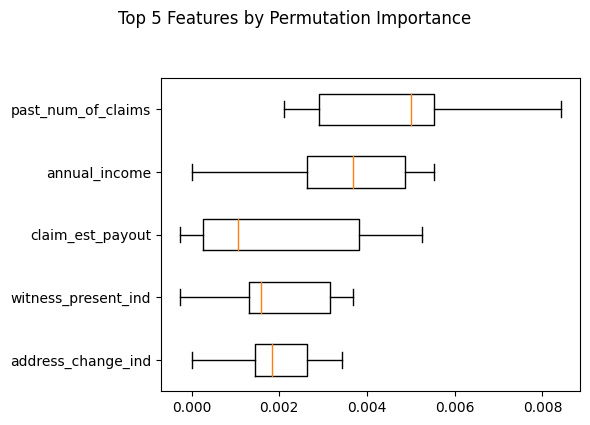

In [ ]:
#Permutation importance is on X_test
#Printing the top 5 features using permutation importance with 15 repeats in a box plot.
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
# a model object to clf!

clf = xgb

result = permutation_importance(clf, X_test, y_test, n_repeats=15,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Get the top 5 feature indices based on permutation importance
top5_indices = perm_sorted_idx[-5:]

# Get the corresponding feature names
top5_features = X_test.columns[top5_indices]

# Create the box plot for the top 3 features
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[top5_indices].T, vert=False, labels=top5_features)
fig.suptitle('Top 5 Features by Permutation Importance', y=1.05)
fig.tight_layout()

#1.7 Partial Dependence

In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pcyebox likes the data to be in a DataFrame so creating one with our imputed data
train_X_df = pd.DataFrame(X_train, columns=X_train.columns)
train_X_df.head(n=10)

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,...,claim_day_of_week_Sunday,claim_day_of_week_Thursday,claim_day_of_week_Tuesday,claim_day_of_week_Wednesday,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_category_Large,vehicle_category_Medium
6787,46.0,0,1.0,50.0,38294.0,1,0,0,0,0.0,...,0,0,0,0,0,1,0,0,1,0
6097,35.0,1,1.0,77.0,35552.0,0,0,1,2,0.0,...,0,0,0,0,0,0,0,1,0,1
11219,63.0,1,1.0,86.0,41432.0,0,1,1,0,0.0,...,0,0,0,0,1,0,0,1,0,0
2512,47.0,1,1.0,81.0,38502.0,1,0,0,0,1.0,...,1,0,0,0,0,1,0,0,1,0
4279,37.0,1,1.0,82.0,36102.0,0,0,0,2,1.0,...,0,0,0,1,1,0,0,0,0,0
12009,31.0,0,0.0,86.0,34315.0,1,0,1,0,1.0,...,1,0,0,0,0,0,0,1,0,1
11550,61.0,1,1.0,90.0,41084.0,1,1,0,0,1.0,...,0,0,1,0,0,0,1,0,0,0
2081,32.0,0,1.0,92.0,34652.0,1,0,1,1,0.0,...,0,0,0,0,0,1,0,0,0,0
11799,25.0,0,1.0,48.0,32173.0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1959,41.0,1,1.0,75.0,37135.0,0,1,1,0,0.0,...,0,0,1,0,1,0,1,0,0,1


## Partial Dependence plot for past_num_of_Claims

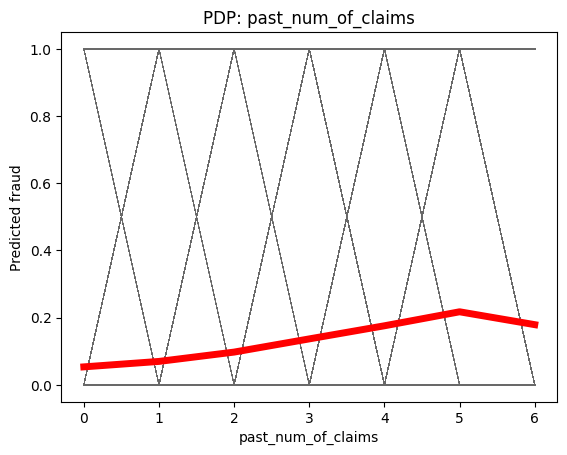

In [ ]:
#Plot 1 for past_num_of_claims

tmpdf = ice(data=train_X_df, column='past_num_of_claims',
                   predict=xgb.predict)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: past_num_of_claims')
plt.ylabel('Predicted fraud')
plt.xlabel('past_num_of_claims');
plt.show()

## Partial Dependence plot for annual_income

In [ ]:
#Ice needs a data frame so creating it
tmpdf = ice(data=train_X_df[0:1000], column='annual_income', predict=xgb.predict)
print(np.shape(tmpdf))

(749, 1000)


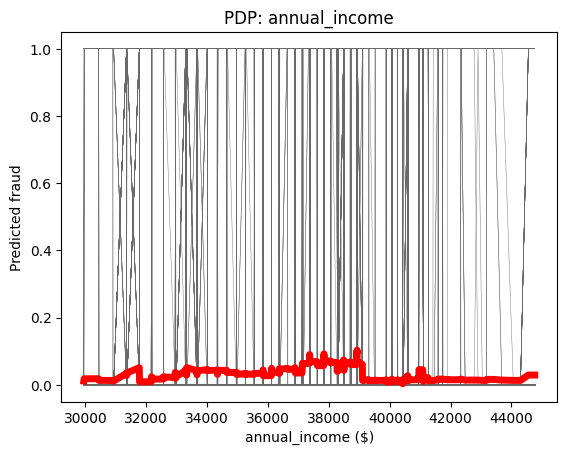

In [ ]:
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: annual_income')
plt.ylabel('Predicted fraud')
plt.xlabel('annual_income ($)');
plt.show()

## Partial Dependence plot for claim_est_payout

In [ ]:
#Ice needs a datframe so creating one
tmpdf = ice(data=train_X_df[0:1000], column='claim_est_payout', predict=xgb.predict)
print(np.shape(tmpdf))

(1000, 1000)


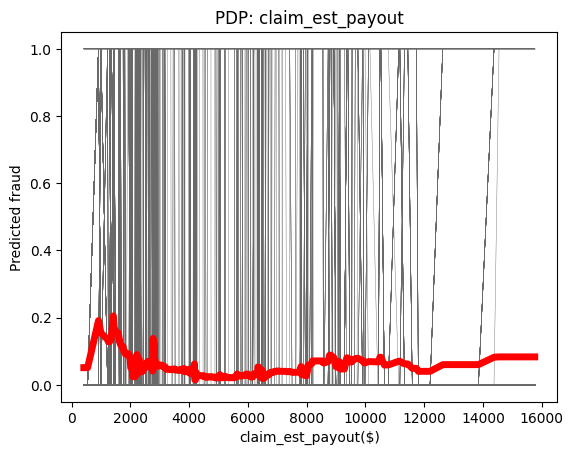

In [ ]:
#plotting the graph
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: claim_est_payout')
plt.ylabel('Predicted fraud')
plt.xlabel('claim_est_payout($)');
plt.show()

## Partial Dependence plot for witness_present_ind

In [ ]:
#Ice needs a datframe so creating one
tmpdf = ice(data=train_X_df[0:1000], column='witness_present_ind', predict=xgb.predict)
print(np.shape(tmpdf))


(2, 1000)


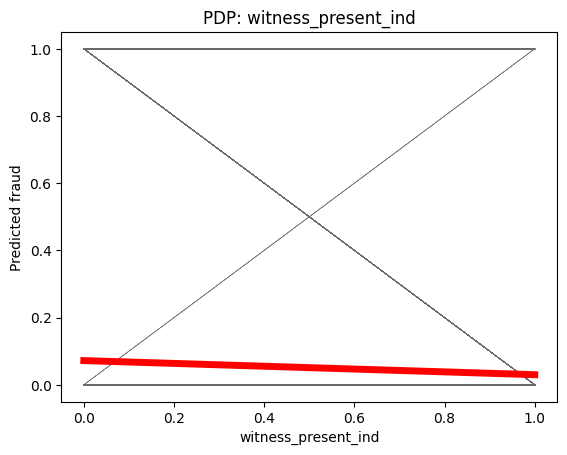

In [ ]:
#plotting the graph
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: witness_present_ind')
plt.ylabel('Predicted fraud')
plt.xlabel('witness_present_ind');
plt.show()

## Partial Dependence plot for address_change_ind

In [ ]:
#Ice needs a datframe so creating one
tmpdf = ice(data=train_X_df[0:1000], column='address_change_ind', predict=xgb.predict)
print(np.shape(tmpdf))


(2, 1000)


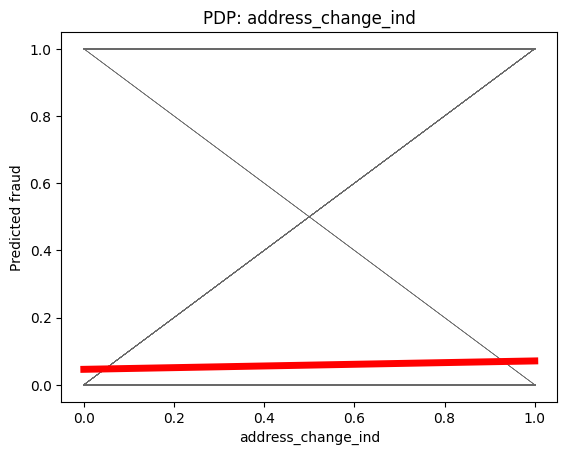

In [ ]:
#plotting the graph
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: address_change_ind')
plt.ylabel('Predicted fraud')
plt.xlabel('address_change_ind');
plt.show()

#Interpretability

**Permutation Importance and Predictor Variables:**

The permutation importance analysis highlights the top five predictor variables contributing significantly to the model: 1. past_num_of_claims, 2. annual_income, 3. claim_est_payout, 4. witness_present_ind, and 5. address_change_ind. The permutation plot reveals the varying impact of these variables, with "past_num_of_claims" displaying changes between 0.002 to 0.008, emphasizing its crucial role. The other four variables exhibit changes between 0 and 0.006, with a slightly differing range, but all values falling within this bracket.

**XGBoost Model Performance:**

The XGBoost Model, developed without sampling, emerges as the best-performing model. In the training partition, it achieves an accuracy of 96% for category 0 and 66% for category 1. Transitioning to the test partition, the model maintains strong performance with an accuracy of 91% for category 0 and 11% for category 1. The overall weighted accuracy for f1 in the test partition is commendable at 0.79.

**Confusion Matrix Results:**

Examining the confusion matrices, the training partition reveals 12,842 True Negatives and 1,174 True Positives. In the test partition, the confusion matrix displays 3,139 True Negatives and 381 True Positives, providing a granular understanding of the model's predictive accuracy.

**ICE Plots and Recommendations:**

 ICE plots for the five important predictor variables offer insights into their significance, even though some variables closely align with the constant line. The first recommendation emphasizes scrutinizing "past_num_of_claims," as individuals with a higher count are more likely to engage in fraudulent activities, as indicated by the ICE plot. The second recommendation advises a
 thorough examination of claims with low  "claim_est_payout" values, particularly those below $1800, whicg demonstrate a higher susceptibility to fraud.Lastly, the third recommendation suggests careful scrutiny of claims falling within the mid-level "annual_income" range between 33,000 to 39,000 as they exhibit a higher likelihood of fraud compared to claims outside this range.




**Importance of Predictor Variables:**


In conclusion, the significance of the five predictor variables—past_num_of_claims, annual_income, claim_est_payout, witness_present_ind, and address_change_ind—is underscored. These variables should be accorded heightened importance during the claim verification process, forming a crucial component of an effective and informed assessment strategy.



#Conclusion
1. The project provided valuable insights into efficiently handling substantial datasets using Python, demonstrating adeptness in data cleaning through techniques such as dropping and imputing. This proficiency was particularly beneficial for managing large volumes of data seamlessly.

2. The exploration of data visualization tools like seaborn and matplotlib enhanced the ability to discern relationships and patterns within the dataset. Techniques such as utilizing boxplots facilitated the identification of outliers, enabling their systematic cleanup and imputation through streamlined code execution.

3. Through the project, a diverse range of models was explored and implemented on a single dataset, each yielding distinct results and accuracies. This experience included understanding and evaluating crucial model parameters, contributing to the selection of the final model.

4. The mastery of grid search and hyperparameter tuning added a powerful dimension to model optimization. The efficiency of these techniques in executing complex tasks within a shorter timeframe was evident, making them valuable tools for future endeavors on platforms like Anaconda and Ellipse.

5. The project equipped us with the skills to identify significant contributors within a dataset, emphasizing the importance of selecting and plotting key predictor variables. This understanding enhances the ability to focus on influential factors, contributing to more informed decision-making.

6. Overall, the project instilled confidence in handling extensive and uncleaned datasets, fostering a robust capability to navigate and analyze large-scale data with proficiency. This newfound confidence extends to working with diverse datasets, laying a solid foundation for future data-driven endeavors.







# Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work. Do not send sloppy code and think you'll be fine - pretend this document is going to your AVP of Data Science - It should be both technical and business-friendly. If you send me garbage, your grade will be garbage!

## EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
  * Any team who does not do this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like SMOTE, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!

## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.
  * You may change the classification threshold from 0.5 to anything else that improves your score.
* Verify your shape of the test partition to ensure there is no data leakage!

## Interpretability and Discussion (30 points)
* Create permutation importance for top five variables
* Create partial dependence plots for top five variables
  * Don't forget about the `num_grid_points` argument to your PDP if it takes a long time to make the plot.
  * Don't wait until the last minute and say your code was crashing - work on this early or I have to deduct points!
* You may add other tables/plots/analyses to help tell your story!
*  Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.
  * We are looking for each team to provide a business recommendation based on the results of your model! We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.
  * Don't use ChatGPT or you get 0 points for this.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 80 to a 100 based on model F1 score for the TEST PARTITION (you can use the `F1 score` function from sci-kit learn to evaluate the final model.)
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade.
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.


Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!

#Appendix

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
LR = LogisticRegression()

# Fit the model
LR.fit(X_train, y_train)

# store the predictions
train_preds_LR = LR.predict(X_train)
test_preds_LR = LR.predict(X_test)
from sklearn.metrics import classification_report
print('Train results: \n')
print(classification_report(y_train, train_preds_LR))
print('Test results: \n')
print(classification_report(y_test, test_preds_LR))

Train results: 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12853
           1       0.00      0.00      0.00      2347

    accuracy                           0.85     15200
   macro avg       0.42      0.50      0.46     15200
weighted avg       0.72      0.85      0.77     15200

Test results: 

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      3209
           1       0.00      0.00      0.00       591

    accuracy                           0.84      3800
   macro avg       0.42      0.50      0.46      3800
weighted avg       0.71      0.84      0.77      3800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
DTC = DecisionTreeClassifier(min_samples_split=25)
DTC.fit(X_train, y_train)
train_preds = DTC.predict(X_train)
test_preds = DTC.predict(X_test)

print('Train results: \n')
print(classification_report(y_train, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12853
           1       0.73      0.45      0.56      2347

    accuracy                           0.89     15200
   macro avg       0.82      0.71      0.75     15200
weighted avg       0.88      0.89      0.88     15200

Test results: 

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3209
           1       0.23      0.16      0.19       591

    accuracy                           0.78      3800
   macro avg       0.54      0.53      0.53      3800
weighted avg       0.76      0.78      0.77      3800



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
RFC = RandomForestClassifier()

# Fit the model
RFC.fit(X_train, y_train)
train_preds = RFC.predict(X_train)
test_preds = RFC.predict(X_test)

print('Train results: \n')
print(classification_report(y_train, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12853
           1       1.00      1.00      1.00      2347

    accuracy                           1.00     15200
   macro avg       1.00      1.00      1.00     15200
weighted avg       1.00      1.00      1.00     15200

Test results: 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3209
           1       0.62      0.01      0.03       591

    accuracy                           0.85      3800
   macro avg       0.73      0.51      0.47      3800
weighted avg       0.81      0.85      0.78      3800



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of GradientBoostingClassifier
GBC = GradientBoostingClassifier()

# Fit the model
GBC.fit(X_train, y_train)
train_preds = GBC.predict(X_train)
test_preds = GBC.predict(X_test)

print('Train results: \n')
print(classification_report(y_train, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12853
           1       0.80      0.04      0.08      2347

    accuracy                           0.85     15200
   macro avg       0.83      0.52      0.50     15200
weighted avg       0.84      0.85      0.79     15200

Test results: 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3209
           1       0.48      0.03      0.05       591

    accuracy                           0.84      3800
   macro avg       0.67      0.51      0.48      3800
weighted avg       0.79      0.84      0.78      3800



In [ ]:
from sklearn.svm import SVC

# Create an instance of SVC (Support Vector Classifier)
SVM = SVC()

# Fit the model
SVM.fit(X_train, y_train)

# Make predictions
train_preds = SVM.predict(X_train)
test_preds = SVM.predict(X_test)
train_preds = SVM.predict(X_train)
test_preds = SVM.predict(X_test)

print('Train results: \n')
print(classification_report(y_train, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12853
           1       0.00      0.00      0.00      2347

    accuracy                           0.85     15200
   macro avg       0.42      0.50      0.46     15200
weighted avg       0.72      0.85      0.77     15200

Test results: 

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      3209
           1       0.00      0.00      0.00       591

    accuracy                           0.84      3800
   macro avg       0.42      0.50      0.46      3800
weighted avg       0.71      0.84      0.77      3800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif